# Hyperparameter Optimization
## Pipelines

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV #, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import MSE, binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy, kl_divergence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
X,y = fetch_openml(data_id=554,return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
def build_nn(activation = 'relu', learning_rate = 3e-2, optimizer = SGD):
    model = Sequential()
    model.add(Dense(300,activation=activation))
    model.add(Dense(100,activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=categorical_crossentropy, 
                  optimizer= optimizer(learning_rate = learning_rate), 
                  metrics=["accuracy"])
    return model

### Simple Pipeline

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
            ('preprocessing', StandardScaler()),
            ('clf',  KerasClassifier(build_nn))
        ]
pipe = Pipeline(steps=steps)

In [6]:
pipe.fit(X_train, y_train)

1750/1750 [==============================] - 5s 3ms/step - loss: 0.4751 - accuracy: 0.8688


Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4A05DA3C8>)])

#### Simple Pipeline Score:

In [7]:
y_pred = pipe.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9512857142857143

### Pipeline Optimization

In [7]:
params = {
          'clf__activation': ['linear', 'sigmoid', 'tanh', 'relu'],
          'clf__learning_rate': [1e-4, 1e-3, 1e-2, 0.1],
          'clf__optimizer': [Adam, SGD] 
         }

"\nparams = {\n            'cleaning__strategy' : ['mean','median','most_frequent','constant'],\n            'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],\n            'clf__early_stopping': [False,True],\n            'clf__hidden_layer_sizes': [1, 2, 3, 4],\n            'clf__learning_rate_init': [3e-3, 3e-2, 1e-2, 0.3, 0.1],\n            'clf__max_iter': [1000, 500]\n         }\n\n\n"

## Grid Search

In [8]:
clf1 = GridSearchCV(estimator=pipe, param_grid=params, 
                    cv=4, error_score=.0, verbose=2)
%time clf1.fit(X=X_train,y=y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1313/1313 [==============================] - 2s 2ms/step - loss: 0.3097 - accuracy: 0.9151
[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  13.7s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


1313/1313 [==============================] - 2s 2ms/step - loss: 0.3095 - accuracy: 0.9138
[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  25.0s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.9140
[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   8.2s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.9139
[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   7.5s
[CV] clf__activation=linear, clf__lea

1313/1313 [==============================] - 3s 2ms/step - loss: 2.2165 - accuracy: 0.1903
[CV]  clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   7.9s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2522 - accuracy: 0.9301
[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   9.2s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9290
[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  10.0s
[CV] clf__activation=tanh, clf__learning_rate=0

1313/1313 [==============================] - 2s 2ms/step - loss: 2.3166 - accuracy: 0.0980
[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  17.4s
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3138 - accuracy: 0.1021
[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   7.3s
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3094 - accuracy: 0.1031
[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=   7.4s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed: 14.3min finished


1750/1750 [==============================] - 6s 3ms/step - loss: 0.3417 - accuracy: 0.8977
Wall time: 14min 27s


GridSearchCV(cv=4, error_score=0.0,
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4A05DA3C8>)]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__activation': ['linear', 'sigmoid', 'tanh', 'relu'], 'clf__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'clf__optimizer': [<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [ ]:
y_pred = clf1.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

### Best Scores + Params:

In [ ]:
clf1.best_score_, clf1.best_params_

## Evolutionary Search

In [69]:
clf3 = EvolutionaryAlgorithmSearchCV(estimator=pipe, params=params,
                                     scoring='accuracy', cv=4, verbose=2,
                                     population_size=50, gene_mutation_prob=0.10,
                                     gene_crossover_prob=.5, tournament_size=3,
                                     generations_number=5, n_jobs=1)
%time clf3.fit(X=X_train,y=y_train)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Types [1, 2, 1] and maxint [3, 3, 0] detected
--- Evolve in 16 possible combinations ---
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 12s 7ms/step - loss: 7.4638 - accuracy: 0.1127


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  41.0s
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 20s 14ms/step - loss: 8.3852 - accuracy: 0.1113


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  46.2s
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 23s 14ms/step - loss: 6.1154 - accuracy: 0.1060


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  54.8s
[CV] clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 21s 11ms/step - loss: 5.3843 - accuracy: 0.1128


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  40.5s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 10ms/step - loss: 0.7477 - accuracy: 0.7936


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  31.8s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7654 - accuracy: 0.7851


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  31.6s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 12ms/step - loss: 0.8239 - accuracy: 0.77140s - loss: 0.837


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  29.8s
[CV] clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.7205 - accuracy: 0.7967


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  35.5s
[CV] clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 17s 11ms/step - loss: 2.7827 - accuracy: 0.1007


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  32.3s
[CV] clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 11ms/step - loss: 2.4778 - accuracy: 0.17510s - l


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  41.8s
[CV] clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 11ms/step - loss: 1.8050 - accuracy: 0.4033


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  29.8s
[CV] clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 11ms/step - loss: 1.7787 - accuracy: 0.3981


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  27.9s
[CV] clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 17s 12ms/step - loss: 0.3709 - accuracy: 0.8875


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  30.9s
[CV] clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 10ms/step - loss: 0.3779 - accuracy: 0.88620s - loss: 0.3808 - ac


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  31.9s
[CV] clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 14s 9ms/step - loss: 0.3747 - accuracy: 0.8862


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  35.4s
[CV] clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 14s 9ms/step - loss: 0.3773 - accuracy: 0.8847


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  46.3s
[CV] clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 7ms/step - loss: 4.9940 - accuracy: 0.7403


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  32.5s
[CV] clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 29s 11ms/step - loss: 4.7186 - accuracy: 0.74570s - loss: 4.6561 - 


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  58.6s
[CV] clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 20s 12ms/step - loss: 4.8767 - accuracy: 0.74122s - loss: 4 - ETA: 2s - loss: 4.4932 - accuracy - - ETA: 1s - loss: - ETA: 1s - loss: 4.6795 - accu - ETA: 0s - - ETA: 0s - loss: 4.8368 - ac


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  50.0s
[CV] clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 4.4853 - accuracy: 0.7455


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  28.0s
[CV] clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 21s 15ms/step - loss: 0.6554 - accuracy: 0.85126s - loss: 0.7157 - accuracy - ETA:  - ETA: 5s - loss: 0.6916 - accuracy: 0.84 - ETA: 5s - loss: 0.6914 -  - ETA: 4s - loss: 0 - E - ETA: 1s - loss: 0.6 - ETA: 0s - loss: 0.6577 


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  31.2s
[CV] clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 26s 13ms/step - loss: 0.6631 - accuracy: 0.8515


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  40.1s
[CV] clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 23s 9ms/step - loss: 0.6582 - accuracy: 0.8502 1s


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  33.7s
[CV] clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 21s 11ms/step - loss: 0.6594 - accuracy: 0.8477


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  30.5s
[CV] clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.4570 - accuracy: 0.8625


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  28.4s
[CV] clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.4455 - accuracy: 0.8652


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  29.8s
[CV] clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 25s 7ms/step - loss: 0.4484 - accuracy: 0.8658


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  43.4s
[CV] clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 17s 12ms/step - loss: 0.4485 - accuracy: 0.86540s - loss: 0.4501 - accu


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  48.0s
[CV] clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 13ms/step - loss: 0.8287 - accuracy: 0.7625


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  54.3s
[CV] clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 11ms/step - loss: 0.8705 - accuracy: 0.7507


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  53.6s
[CV] clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 26s 10ms/step - loss: 0.8124 - accuracy: 0.7659


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  59.7s
[CV] clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 22s 9ms/step - loss: 0.8154 - accuracy: 0.7642


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  45.9s
[CV] clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 9ms/step - loss: 1.4691 - accuracy: 0.6607


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  37.6s
[CV] clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 13s 8ms/step - loss: 1.4973 - accuracy: 0.6342


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  29.2s
[CV] clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 8ms/step - loss: 1.5406 - accuracy: 0.6396


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  37.0s
[CV] clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 11ms/step - loss: 1.4553 - accuracy: 0.65680s - loss: 1.4585 - accuracy: 0.


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  27.6s
[CV] clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 10ms/step - loss: 5372.9531 - accuracy: 0.6790


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  27.2s
[CV] clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 12ms/step - loss: 4731.0808 - accuracy: 0.6915


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  33.9s
[CV] clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 10ms/step - loss: 4171.4425 - accuracy: 0.6867


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  33.7s
[CV] clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 10ms/step - loss: 4439.9131 - accuracy: 0.6954 4s - loss:  - ETA: 


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=linear, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  43.2s
[CV] clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 27s 17ms/step - loss: 1.8648 - accuracy: 0.6479: 25s - loss: 2.2059 - accuracy: 0. - ETA: 26s -  - ETA: 23s - loss: 1.9916 - accuracy: 0. - ETA: 23s - loss: 1.98


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total= 1.1min
[CV] clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 20s 14ms/step - loss: 1.8068 - accuracy: 0.66051s - loss: 1.8097 - accuracy - ETA: 0s - los


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total= 1.1min
[CV] clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - ETA: 0s - loss: 1.8654 - accuracy: 0.64 - 17s 12ms/step - loss: 1.8654 - accuracy: 0.6484


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  52.9s
[CV] clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 12ms/step - loss: 1.8814 - accuracy: 0.6551


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.1, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  41.4s
[CV] clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.6653 - accuracy: 0.83802s


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  39.7s
[CV] clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 22s 12ms/step - loss: 0.6622 - accuracy: 0.8372


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  40.2s
[CV] clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 20s 13ms/step - loss: 0.6286 - accuracy: 0.8380


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  33.8s
[CV] clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 20s 13ms/step - loss: 0.6561 - accuracy: 0.8332


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  28.7s
[CV] clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 24s 14ms/step - loss: 0.3906 - accuracy: 0.8824


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  30.2s
[CV] clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.3924 - accuracy: 0.88470s - loss: 0.4 - ETA: 0s - loss: 0.3948 - accu


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  35.1s
[CV] clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.3756 - accuracy: 0.88922s - loss: 0.3983 - accuracy:  - ETA: 2s - los - ETA: 1s - loss: 0.389


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  32.1s
[CV] clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 19s 13ms/step - loss: 0.3849 - accuracy: 0.8876


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=relu, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  33.3s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 22s 13ms/step - loss: 0.7296 - accuracy: 0.7881: 2s - loss: 0.7694  - ETA: 1s - loss: 0.7 - ETA: 0s - loss: 0 - ETA: 0s - loss: 0.7343 - ac


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  37.0s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 25s 12ms/step - loss: 0.7469 - accuracy: 0.7785 - ETA: 0s - loss: 0.7478 - accuracy: 0.77


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  46.8s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 12ms/step - loss: 0.7205 - accuracy: 0.7903


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  52.4s
[CV] clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 9ms/step - loss: 0.7385 - accuracy: 0.7825


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=tanh, clf__learning_rate=0.0001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  40.2s
[CV] clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 10ms/step - loss: 0.4243 - accuracy: 0.8686


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  41.4s
[CV] clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 17s 9ms/step - loss: 0.4643 - accuracy: 0.8617


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  55.6s
[CV] clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 13s 9ms/step - loss: 0.4316 - accuracy: 0.8685


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  39.9s
[CV] clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 16s 9ms/step - loss: 0.4213 - accuracy: 0.8737


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.01, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  23.7s
gen	nevals	avg     	min  	max     	std     
0  	50    	0.722171	0.099	0.954321	0.278101
[CV] clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 15s 10ms/step - loss: 0.6319 - accuracy: 0.8398


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  22.1s
[CV] clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 17s 11ms/step - loss: 0.6274 - accuracy: 0.8454


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  31.6s
[CV] clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 18s 10ms/step - loss: 0.6261 - accuracy: 0.83835s - l - ETA: 4s - ETA: 3s - loss: 0.7053 - 


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  32.5s
[CV] clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> 
1313/1313 [==============================] - 24s 13ms/step - loss: 0.6367 - accuracy: 0.83870s -


c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  clf__activation=sigmoid, clf__learning_rate=0.001, clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, total=  38.0s
1  	33    	0.874921	0.099	0.954321	0.14648 
2  	38    	0.934052	0.868107	0.954321	0.0249449
3  	30    	0.952847	0.934554	0.954321	0.00416547
4  	20    	0.934304	0.099   	0.954321	0.120208  
5  	29    	0.953926	0.934554	0.954321	0.0027675 
Best individual is: {'clf__activation': 'relu', 'clf__learning_rate': 0.001, 'clf__optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}
with fitness: 0.9543214285714285
1750/1750 [==============================] - 26s 11ms/step - loss: 0.3558 - accuracy: 0.8966
Wall time: 42min 37s


In [70]:
y_pred = clf3.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9627857142857142

### Best Scores + Params:

In [67]:
clf3.best_score_, clf3.best_params_

(0.9556785714285714,
 {'clf__activation': 'relu',
  'clf__learning_rate': 0.001,
  'clf__optimizer': tensorflow.python.keras.optimizer_v2.adam.Adam})

## Random Search

In [9]:
clf2 = RandomizedSearchCV(estimator=pipe, param_distributions=params, 
                          n_iter=15, cv=4, verbose =2)
%time clf2.fit(X=X_train,y=y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1313/1313 [==============================] - 2s 2ms/step - loss: 1.6789 - accuracy: 0.4787
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid, total=  29.5s
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.4s remaining:    0.0s


1313/1313 [==============================] - 4s 3ms/step - loss: 2.0638 - accuracy: 0.1878
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid, total=  28.7s
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid 
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4246 - accuracy: 0.4857
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid, total=   8.7s
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid 
1313/1313 [==============================] - 3s 3ms/step - loss: 1.7497 - accuracy: 0.2702
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.1, clf__activation=sigmoid, total=   9.4s
[CV] clf__optimizer=<class 'tensorflow.python.k

1313/1313 [==============================] - 3s 2ms/step - loss: 0.3998 - accuracy: 0.8876
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.01, clf__activation=relu, total=   8.8s
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.0001, clf__activation=sigmoid 
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4930 - accuracy: 0.8966
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.0001, clf__activation=sigmoid, total=   8.6s
[CV] clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.0001, clf__activation=sigmoid 
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5215 - accuracy: 0.8911
[CV]  clf__optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, clf__learning_rate=0.0001, clf__activation=sigmoid, total=  18.2s
[CV] clf__optimizer=<class 'tensorflo

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.9min finished


1750/1750 [==============================] - 9s 4ms/step - loss: 0.3415 - accuracy: 0.8983
Wall time: 15min 8s


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4A05DA3C8>)]),
          fit_params=None, iid='warn', n_iter=15, n_jobs=None,
          param_distributions={'clf__activation': ['linear', 'sigmoid', 'tanh', 'relu'], 'clf__learning_rate': [0.0001, 0.001, 0.01, 0.1], 'clf__optimizer': [<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:
y_pred = clf2.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

### Best Scores + Params:

In [ ]:
clf2.best_score_, clf2.best_params_

### Ergebnisse:

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.

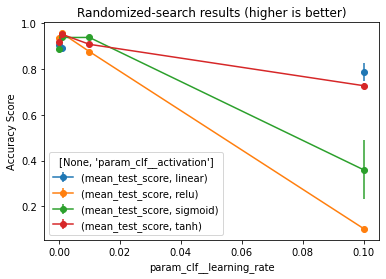

In [10]:
def plot_results(index='dar__ordar', columns='dar__ordriv'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf2.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
        df = df[df[col] == clf2.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Randomized-search results (higher is better)')
    plt.ylabel('Accuracy Score')
    plt.legend(title=table_mean.columns.names)
    plt.savefig('Randomized_Search.png')
    plt.show()
    


#plot_results(index='clf__activation', columns='clf__learning_rate')
plot_results(index='clf__learning_rate', columns='clf__activation')


### Auswertung

In [62]:
param_cols = ['params']
score_cols = ['mean_test_score', 'std_test_score']
 
# look at first five params with head()
df = pd.DataFrame(clf3.cv_results_)
df
#display(df[param_cols + score_cols])

,param_index,index,params,mean_test_score,std_test_score,min_test_score,max_test_score,nan_test_score?
0,0,51,"{'clf__activation': 'sigmoid', 'clf__learning_...",0.949571,0.0,0.949571,0.949571,False
1,0,52,"{'clf__activation': 'tanh', 'clf__learning_rat...",0.939946,0.0,0.939946,0.939946,False
2,0,53,"{'clf__activation': 'linear', 'clf__learning_r...",0.905679,0.0,0.905679,0.905679,False
3,0,54,"{'clf__activation': 'linear', 'clf__learning_r...",0.888732,0.0,0.888732,0.888732,False
4,0,55,"{'clf__activation': 'relu', 'clf__learning_rat...",0.919768,0.0,0.919768,0.919768,False
...,...,...,...,...,...,...,...,...
161,0,234,"{'clf__activation': 'relu', 'clf__learning_rat...",0.955679,0.0,0.955679,0.955679,False
162,0,235,"{'clf__activation': 'relu', 'clf__learning_rat...",0.955679,0.0,0.955679,0.955679,False
163,0,237,"{'clf__activation': 'relu', 'clf__learning_rat...",0.955679,0.0,0.955679,0.955679,False
164,0,238,"{'clf__activation': 'relu', 'clf__learning_rat...",0.955679,0.0,0.955679,0.955679,False
